<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml1017/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# tensorflow 2 -> tensorflow + keras
# tensorflow 2 -> 不須特別安裝gpu版, 只要你安裝好cuda+cudnn, 自動判定
from tensorflow.keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


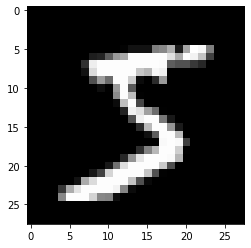

In [21]:
# 只要看到matplotlib有cmap參數
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# 如果你要反過來, _r PiYG->PiYG_r
import pandas as pd
import matplotlib.pyplot as plt
idx = 0
plt.imshow(x_train[idx], cmap="gray")
pd.DataFrame(x_train[idx])

In [22]:
# tensorflow模型
# 1. 地基(model): Sequential(一層疊一層), Model(自由)
# 2. 層(layer): Dense(全連接層)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

layers = [
    # 784 * 128 + 128(bias) = 100480
    Dense(128, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias) = 1290
    Dense(10, activation="softmax")    
]
model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 如果你最後輸出是
# 1個神經元: BinaryCrossEntropy plog(1/q) + (1-p)log(1/1-q)
# 多個神經元: CategoricalCrossEntropy  pilog(1/qi)
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [24]:
# y: one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [25]:
# x: 攤平(28*28->784), Scaling to 0-1(配合tensorflow)
# reshape: 你可以某個位置設置-1, 讓他自己去算
x_train_norm = x_train.reshape(60000, 784) / 255.0
x_test_norm = x_test.reshape(10000, 784) / 255.0

In [26]:
import numpy as np
n = np.array([
    [1, 2],
    [3, 4],
    [5, 6]
])
n.reshape(-1, 3)

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
# batch_size: 我看多少筆, 把所有筆的斜率做一個平均, 再調整
# 圖片小(不吃那麼多ram):100-200 圖片大(吃很多ram):10-20
# 60000筆, 200比一次調整  -> 300次調整
# epochs: 整份資料看幾遍(你覺得模型訓練好就停下來)
# validation_split: 切出一部份資料來做模型確認
# epochs + validation: 什麼時候停下來(val_loss平滑的時候就停下來)
# epoch: 60000筆(90%) -> 54000 / 200 -> 270調整
# verbose: 決定log印多少 1(default):進度條 2:沒有進度條, 0:完全不印
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    ModelCheckpoint("mlp.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train_cat,
     batch_size=200,
     epochs=50,
     validation_split=0.1,
     callbacks=callbacks,
     verbose=2)

In [28]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0772 - accuracy: 0.9777


[0.07722032815217972, 0.9776999950408936]